In [11]:
# Mengimpor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Membaca dataset Data_Asuransi_Jiwa.csv
dataset = pd.read_csv('Data_Asuransi_Jiwa1.csv')

# Mengambil fitur (Umur, Penghasilan) dan label (DaftarAsuransi)
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [12]:
# Mengecek jumlah data dalam dataset
print("Jumlah data:", len(dataset))

Jumlah data: 400


In [13]:
from sklearn.model_selection import train_test_split

# Membagi data ke dalam data latih dan data uji (25% untuk testing)
x_latih, x_tes, y_latih, y_tes = train_test_split(x, y, test_size=0.25, random_state=0)

# Menampilkan data latih
print("Data latih:\n", x_latih)

Data latih:
 [[    36 111792]
 [    53  80160]
 [    54  96539]
 [    44 132856]
 [    20  62344]
 [    50 110469]
 [    42  92369]
 [    30  81529]
 [    28  81476]
 [    51  53591]
 [    56 102986]
 [    34 140420]
 [    38 102848]
 [    38  87215]
 [    39  98752]
 [    36  94460]
 [    53  39870]
 [    31  46646]
 [    24 144097]
 [    46  86203]
 [    52 117856]
 [    58  43625]
 [    48  82856]
 [    42  70343]
 [    21  25713]
 [    49 103042]
 [    50  89042]
 [    20  60262]
 [    24 122023]
 [    54  20728]
 [    45 108726]
 [    43  81813]
 [    32  36364]
 [    43 108092]
 [    20 109930]
 [    25  58494]
 [    58  81642]
 [    49 122795]
 [    48  72736]
 [    41  79638]
 [    23 130448]
 [    40  52307]
 [    32  64078]
 [    52  35305]
 [    52 123605]
 [    51  32161]
 [    40  24835]
 [    54  33807]
 [    47 113105]
 [    31  96797]
 [    49  88866]
 [    43  40358]
 [    47  81629]
 [    52 108668]
 [    53  58102]
 [    40  58756]
 [    50  29435]
 [    32  31338]
 

In [14]:
from sklearn.preprocessing import StandardScaler

# Melakukan standardisasi fitur agar model lebih akurat
sc = StandardScaler()
x_latih = sc.fit_transform(x_latih)
x_tes = sc.transform(x_tes)

# Menampilkan data latih setelah distandarkan
print("Data latih setelah scaling:\n", x_latih)

Data latih setelah scaling:
 [[-0.26549021  0.81526806]
 [ 1.10634368 -0.05353499]
 [ 1.18703979  0.39632987]
 [ 0.38007868  1.39381092]
 [-1.55662798 -0.54286842]
 [ 0.86425535  0.77893061]
 [ 0.21868646  0.28179684]
 [-0.74966687 -0.0159341 ]
 [-0.91105909 -0.01738979]
 [ 0.94495146 -0.78327792]
 [ 1.34843202  0.57340287]
 [-0.42688243  1.60156339]
 [-0.10409798  0.56961257]
 [-0.10409798  0.14023732]
 [-0.02340187  0.45711203]
 [-0.26549021  0.33922815]
 [ 1.10634368 -1.16013827]
 [-0.66897076 -0.97402897]
 [-1.23384354  1.7025557 ]
 [ 0.5414709   0.11244177]
 [ 1.02564757  0.98182161]
 [ 1.50982424 -1.05700361]
 [ 0.70286313  0.02051322]
 [ 0.21868646 -0.32316826]
 [-1.47593187 -1.54897378]
 [ 0.78355924  0.57494097]
 [ 0.86425535  0.19041761]
 [-1.55662798 -0.60005254]
 [-1.23384354  1.09627224]
 [ 1.18703979 -1.68589156]
 [ 0.46077479  0.73105745]
 [ 0.29938257 -0.00813377]
 [-0.58827465 -1.25643391]
 [ 0.29938257  0.71364403]
 [-1.55662798  0.76412646]
 [-1.15314743 -0.64861235]

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat dan melatih model K-NN
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_latih, y_latih)

KNeighborsClassifier()

In [16]:
# Melakukan prediksi terhadap data uji
y_prediksi = classifier.predict(x_tes)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Menghitung confusion matrix dan akurasi
hasil_cm = confusion_matrix(y_tes, y_prediksi)
accuracy = accuracy_score(y_tes, y_prediksi)

print("Confusion Matrix:\n", hasil_cm)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

Confusion Matrix:
 [[41  3]
 [ 0 56]]
Akurasi Model: 97.00%


<ipython-input-18-950e0f6601fa>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


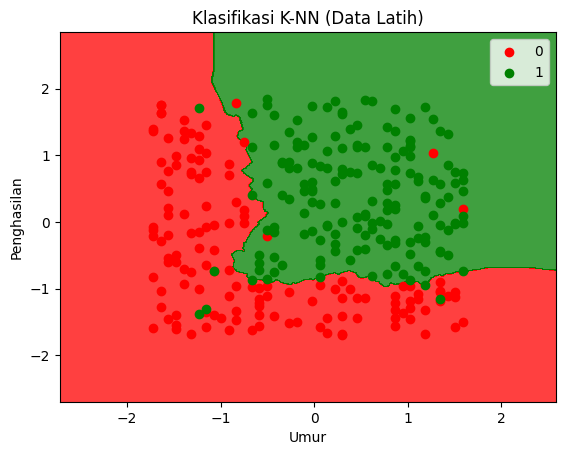

In [18]:
from matplotlib.colors import ListedColormap

# Visualisasi hasil klasifikasi data latih
x_data, y_data = x_latih, y_latih
x_one, x_two = np.meshgrid(
    np.arange(start=x_data[:, 0].min()-1, stop=x_data[:, 0].max()+1, step=0.01),
    np.arange(start=x_data[:, 1].min()-1, stop=x_data[:, 1].max()+1, step=0.01)
)

plt.contourf(x_one, x_two,
             classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())

for g, h in enumerate(np.unique(y_data)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                c=ListedColormap(('red', 'green'))(g), label=h)

plt.title('Klasifikasi K-NN (Data Latih)')
plt.xlabel('Umur')
plt.ylabel('Penghasilan')
plt.legend()
plt.show()

<ipython-input-19-2b1cb5fa7354>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


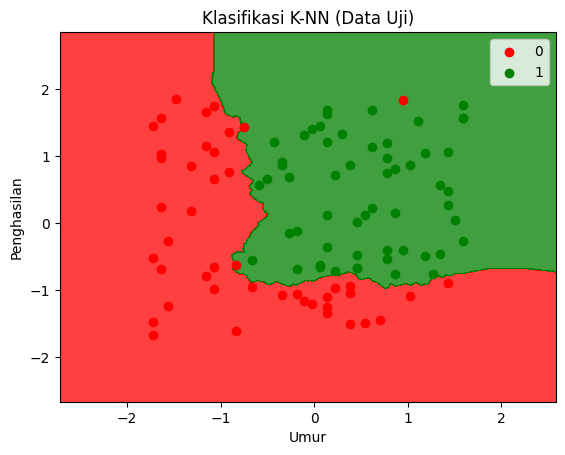

In [19]:
# Visualisasi hasil klasifikasi data uji
x_data, y_data = x_tes, y_tes
x_one, x_two = np.meshgrid(
    np.arange(start=x_data[:, 0].min()-1, stop=x_data[:, 0].max()+1, step=0.01),
    np.arange(start=x_data[:, 1].min()-1, stop=x_data[:, 1].max()+1, step=0.01)
)

plt.contourf(x_one, x_two,
             classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())

for g, h in enumerate(np.unique(y_data)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                c=ListedColormap(('red', 'green'))(g), label=h)

plt.title('Klasifikasi K-NN (Data Uji)')
plt.xlabel('Umur')
plt.ylabel('Penghasilan')
plt.legend()
plt.show()